# PCA

Principal Component Analysis (PCA) is a fundamental technique in machine learning and statistics for **dimensionality reduction**. It transforms high-dimensional data into a smaller set of linearly uncorrelated variables called **principal components**, while retaining as much variance (information) as possible.

In high-dimensional datasets:
- Features may be **correlated or redundant**.
- Visualization becomes **impossible beyond 3D**.
- Models may **overfit** or slow down due to the **curse of dimensionality**.

PCA solves this by:
- Identifying new axes (directions) that capture **maximum variance**.
- Projecting data onto these axes to form a **compressed representation**.
- Ensuring components are **orthogonal** (uncorrelated).

These new axes are ordered by importance:
- **PC1** captures the highest variance.
- **PC2** is the next most informative direction and is orthogonal to PC1.
- And so on...

###  Common Use Cases:
- Data preprocessing before machine learning
- Noise reduction
- Feature extraction and decorrelation
- Visualization of high-dimensional data (e.g., plotting 100D features in 2D)

PCA is **unsupervised** — it doesn’t rely on class labels or outcomes. It only looks at feature structure and variance.

In short:

> **PCA is like finding a smarter way to look at your data** — one that simplifies complexity, reveals structure, and preserves what matters most.

## Key Concepts

### **Eigenvectors**
Eigenvectors represent the directions in which the data varies the most. These directions become the new axes in the transformed feature space — called **principal components**.

### **Eigenvalues**
Eigenvalues indicate the amount of variance captured along each eigenvector. A higher eigenvalue means more of the data’s structure (variance) is aligned with that direction.

---

##  Step-by-Step PCA Procedure

### **Step 1: Standardize the Data**

Center each feature by subtracting the mean:

$$
X_{\text{centered}} = X - \mu
$$

Where $ \mu $ is the mean vector of shape $ (1 \times d) $.

---

### **Step 2: Compute the Covariance Matrix**

Compute the covariance matrix:

$$
\Sigma = \frac{1}{n - 1} X_{\text{centered}}^T X_{\text{centered}}
$$

This captures how each feature varies with every other feature.

---

### **Step 3: Eigen Decomposition**

Find eigenvectors and eigenvalues of the covariance matrix:

$$
\Sigma \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

Where:
- $ \mathbf{v}_i $: the $ i $-th eigenvector (principal component direction)  
- $ \lambda_i $: eigenvalue (variance along that component)

---

### **Step 4: Sort Eigenvectors by Eigenvalues**

Sort eigenvectors in descending order of their eigenvalues and select the top $ k $ to form the projection basis.

---

### **Step 5: Project the Data**

Project the original data into the lower-dimensional space using the top $ k $ eigenvectors:

$$
Z = X_{\text{centered}} \cdot W_k
$$

Where:
- $ W_k \in \mathbb{R}^{d \times k} $: matrix of top $ k $ eigenvectors  
- $ Z \in \mathbb{R}^{n \times k} $: projected data

---

##  Summary Table

| Concept             | Meaning                                      |
|---------------------|----------------------------------------------|
| Principal Component | New axis that captures maximum variance     |
| Eigenvalue          | Variance captured by each principal axis     |
| Eigenvector         | Direction (axis) of principal component      |
| Projection          | New representation of data in PC space       |

---

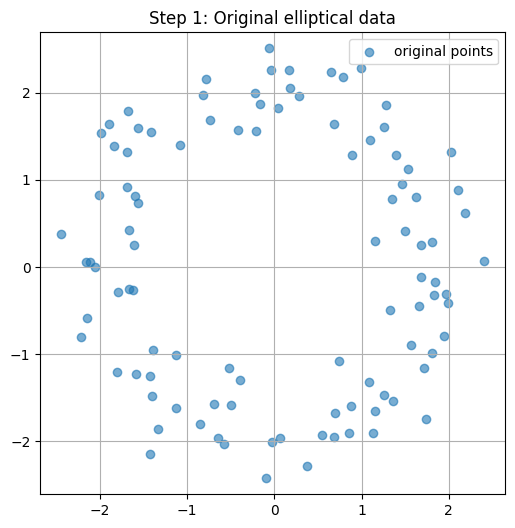

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#CREATING AN ELLIPTICAL DATASET

t = np.linspace(0,2*np.pi,100)
x=2*np.cos(t)+np.random.normal(0,00.3,size=t.shape)
y=2*np.sin(t)+np.random.normal(0,00.3,size=t.shape)
X=np.vstack([x,y]).T

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],alpha=0.6, label='original points')
plt.title("Step 1: Original elliptical data")
plt.grid(True)
plt.axis('equal')
plt.legend()


* The points are shaped like a squashed ellipse.

* There’s an obvious “long axis” direction, even though the data isn't aligned with x or y.

* PCA will rotate the coordinate system to capture that elongated spread.

(np.float64(-2.6910396240720447),
 np.float64(2.642296163124728),
 np.float64(-2.720958561645938),
 np.float64(2.7035660383230073))

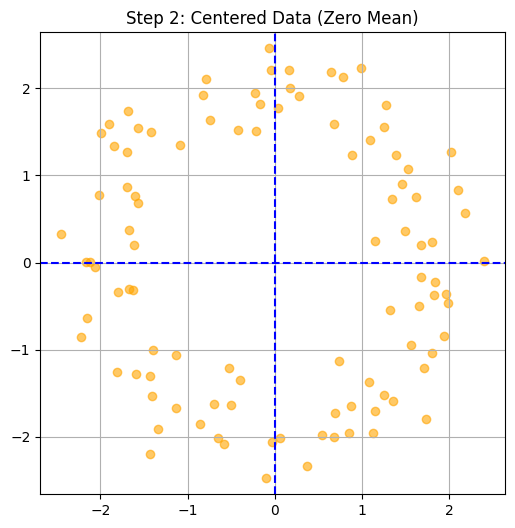

In [ ]:
# Step 2: Center the data (subtract mean)
mean = np.mean(X,axis=0) #mean for each column/feature
X_c = X-mean

plt.figure(figsize=(6, 6))
plt.scatter(X_c[:, 0], X_c[:, 1], alpha=0.6, color='orange')
plt.axhline(0, color='blue', linestyle='--')
plt.axvline(0, color='blue', linestyle='--')
plt.title("Step 2: Centered Data (Zero Mean)")
plt.grid(True)
plt.axis('equal')

* We subtract the mean of each feature so the data is centered around (0, 0).

* This is essential because PCA is only interested in the shape and spread, not the absolute position.



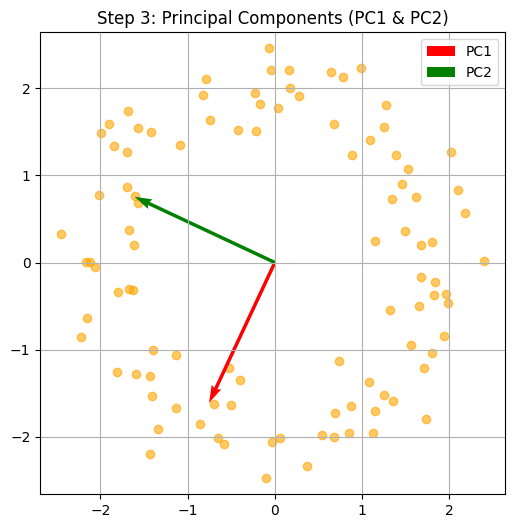

In [ ]:
# Step 3a: Covariance matrix of the centered data

cov = np.cov(X_c.T)

# Step 3b: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov)

# Step 3c: Sort eigenvectors by eigenvalue (descending)
sorted_idx = np.argsort(eig_vals)[::-1] #descending order
eig_vals=eig_vals[sorted_idx]
eig_vecs=eig_vecs[sorted_idx]

# Step 3d: Extract principal components
pc1 = eig_vecs[:,0]
pc2=eig_vecs[:,1]

plt.figure(figsize=(6, 6))
plt.scatter(X_c[:, 0], X_c[:, 1], alpha=0.6, color='orange')
origin = [0, 0]
plt.quiver(*origin,*pc1,scale=3,color='red',label='PC1')
plt.quiver(*origin, *pc2, scale=3, color='green', label='PC2')
plt.title("Step 3: Principal Components (PC1 & PC2)")
plt.legend()
plt.axis('equal')
plt.grid(True)

* Red (PC1): The most important direction — aligns with the longest stretch of the ellipse.

* Green (PC2): The second direction — perpendicular to PC1, with much less spread.

* These axes are uncorrelated and capture the geometry of the data.

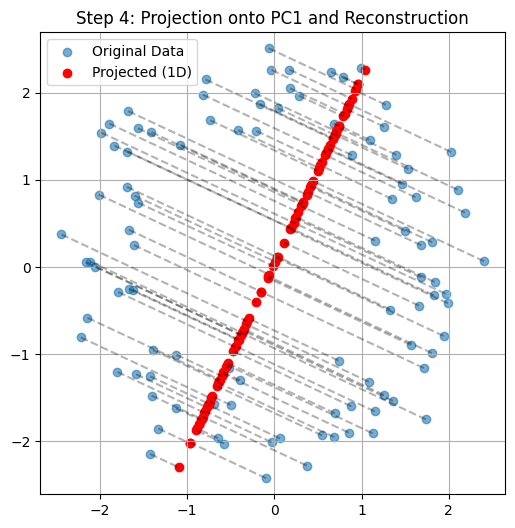

In [ ]:
# Step 4a: Project data onto PC1
Z=X_c@pc1
# Step 4b: Reconstruct the projected points back to 2D (along PC1)
X_proj=np.outer(Z,pc1)+mean

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.6)
plt.scatter(X_proj[:, 0], X_proj[:, 1], label='Projected (1D)', color='red')
for i in range(len(X)):
  plt.plot([X[i,0],X_proj[i,0]],[X[i, 1], X_proj[i, 1]],'k--', alpha=0.3)
plt.title("Step 4: Projection onto PC1 and Reconstruction")
plt.legend()
plt.axis('equal')
plt.grid(True)


* Red points are the 1D projections of the original points.

* Each projection lies along the PC1 axis — reducing the data from 2D to 1D.

* Dotted lines show how much detail is lost (distance to projection).

# PCA Analysis on iris dataset


In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
iris_data=load_iris()

X=iris_data.data
y=iris_data.target
target_names = iris_data.target_names
# Fit finds the main direction (PCs) from the data
# Transform projects the data onto that direction
# fit_transform does both in one step
estimator = PCA(n_components=1)
X_pca = estimator.fit_transform(X)

print("So the number of features are down from", X.shape[1], "to", X_pca.shape[1])




So the number of features are down from 4 to 1


| Transformer            | What It Learns (`fit`)         | What It Does (`transform`)               |
| ---------------------- | ------------------------------ | ---------------------------------------- |
| `StandardScaler()`     | Mean & std of each feature     | Scales features to mean 0, std 1         |
| `MinMaxScaler()`       | Min & max of each feature      | Scales to range \[0, 1]                  |
| `Normalizer()`         | Vector norms                   | Scales each sample to unit norm          |
| `PCA()`                | Principal components           | Projects data to lower-dimensional space |
| `TfidfVectorizer()`    | Vocabulary & IDF values        | Converts text to TF-IDF-weighted vectors |
| `CountVectorizer()`    | Vocabulary                     | Converts text to word count vectors      |
| `OneHotEncoder()`      | Unique categories              | Creates one-hot encoded binary matrix    |
| `LabelEncoder()`       | Unique class labels            | Converts labels to numeric indices       |
| `PolynomialFeatures()` | Combinations of input features | Expands features to polynomial space     |


In [ ]:


def generate_random_colors(n):
    np.random.seed(42)  # for reproducibility
    return np.random.rand(n, 3)  # n RGB colors

colors = generate_random_colors(3)  # example for 5 classes
colors=['red','blue','green']
print(colors)


['red', 'blue', 'green']


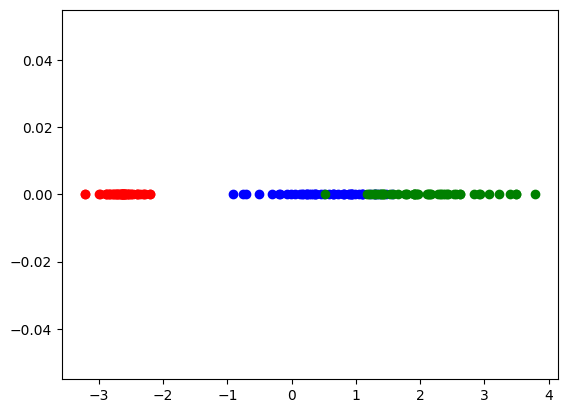

In [ ]:
for i in range(len(colors)):
 px=X_pca[:,0][y==i]


 plt.scatter(px, [0] * len(px), color=colors[i], label=iris_data.target_names[i])

In [ ]:
print(estimator.explained_variance_,estimator.explained_variance_ratio_)

[4.22824171] [0.92461872]


#  Understanding PCA Output Metrics

After fitting a PCA model in scikit-learn, two key attributes help interpret how much information is preserved:

## explained_variance_
Returns the raw variance captured by each principal component.
Larger values indicate components that carry more spread (information) from the original data.

## explained_variance_ratio_

Returns the proportion of total variance explained by each component.
This helps assess how much of the data’s structure is retained after dimensionality reduction.
